In [68]:
import pandas as pd
import numpy as np 
import os
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from sklearn.impute import KNNImputer

# 한글 폰트 설정 (예: 나눔고딕)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
# 출처: https://giveme-happyending.tistory.com/168 [소연의_개발일지:티스토리]

In [88]:
train = pd.read_csv('train.csv')

# 월 데이터 생성
train.일시 = pd.to_datetime(train.일시)
train['월'] = train.일시.dt.month

# 데이터 전처리

prep_data = train.drop(['일시'], axis = 1)
columns = prep_data.columns

# KNNImputer를 사용하여 결측치 대체

imputer = KNNImputer(n_neighbors=10)
imputed_data = imputer.fit_transform(prep_data)

# 대체된 데이터를 새로운 데이터프레임으로 생성
imputed_df = pd.DataFrame(imputed_data, columns=columns)

# 원래 데이터프레임과 대체된 데이터프레임을 병합
merged_df = prep_data.copy()  # 병합할 데이터프레임을 원래 데이터프레임으로 복사
merged_df.loc[:, :] = imputed_df.values  # 대체된 값으로 데이터프레임을 업데이트

#일시 merge

merged_df['ds'] = train.일시

In [89]:
merged_df
merged_df.to_csv('prep_data.csv', index = False)

In [87]:
merged_df

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,월
0,2.2,-5.2,7.4,0.34,68.3,1.7,6.7,7.029,63.10,-1.6,1.0
1,1.2,-5.6,6.8,0.40,87.7,1.3,0.0,2.887,4.19,-1.9,1.0
2,8.7,-2.1,10.8,0.00,81.3,3.0,0.0,5.854,12.87,4.0,1.0
3,10.8,1.2,9.6,0.00,79.7,4.4,2.6,6.279,21.55,7.5,1.0
4,1.3,-8.2,9.5,0.05,44.0,5.1,8.2,13.086,81.51,-4.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
23006,3.3,-7.3,10.6,0.57,69.8,1.8,8.8,10.250,91.70,-2.6,12.0
23007,0.1,-6.0,6.1,0.10,58.1,2.5,8.7,10.860,90.60,-3.3,12.0
23008,2.1,-7.8,9.9,0.00,56.3,1.7,9.0,10.880,93.80,-2.9,12.0
23009,2.3,-4.4,6.7,0.00,65.6,1.9,7.9,10.840,82.30,-1.8,12.0


# 강수량 > 일사합 > 일조율 > 일조합 순으로 Null값이 존재
이에 대한 고려가 필요할 것(제외? 대체?)

<Figure size 864x720 with 0 Axes>

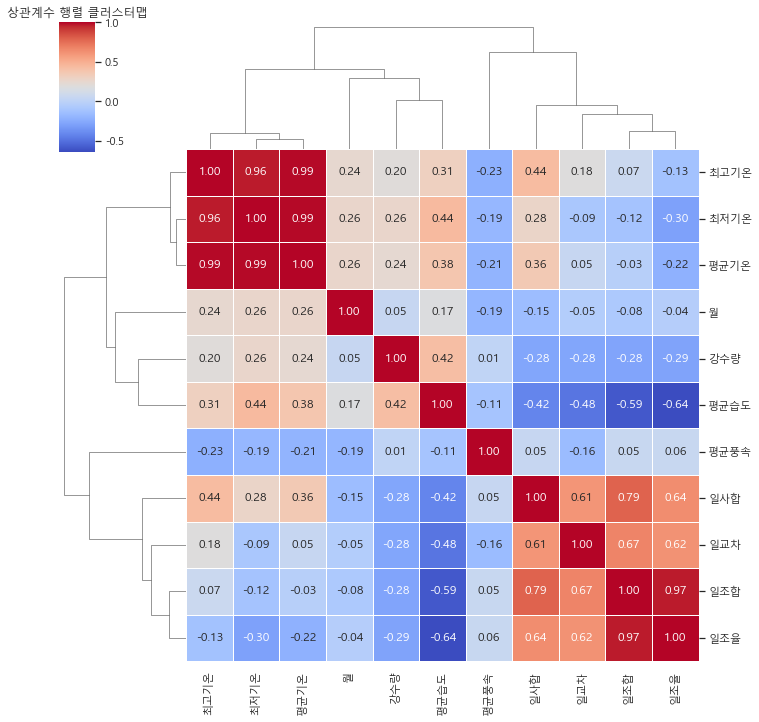

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# train.corr()는 상관계수 행렬을 반환
correlation_matrix = train.corr()

# 클러스터맵 생성
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("상관계수 행렬 클러스터맵")
plt.show()


일교차 일조합은 제외해도 무방할 것으로 판단
일조율/평균풍속/일사합/강수량이 문제가 될 것
평균습도하고 강수량하고의 관계를 밝혀내봐도 좋을 듯

In [39]:
#강수량 기록이 있는 데이터만 추출 후 분석

rain = train[train.강수량.isnull() == False]

#강수여부 컬럼 생성 후 비가 온 날의 평균습도와 비가 오지 않은 날의 평균습도에 유의미한 차이가 있는지 확인

rain['강수여부'] = rain.강수량.map( lambda x : "Y" if x > 0 else "N")

rain

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,강수여부
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9,Y
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0,N
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5,N
5,1960-01-06,-1.2,-9.5,8.3,0.0,51.3,1.8,7.7,NaN,NaN,-5.2,N
6,1960-01-07,6.0,-3.5,9.5,0.1,74.0,1.3,1.9,NaN,NaN,1.3,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
23000,2022-12-21,2.6,-2.6,5.2,3.6,82.4,2.7,0.0,2.48,0.0,-0.1,Y
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,Y
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,N
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,N


In [44]:
#두 그룹 간 차이가 유의미한지 알아보기 위해 T검정

from scipy.stats import ttest_ind

# 두 그룹의 예제 데이터 생성

group1 = rain[rain.강수여부 == "Y"].평균습도
group2 = rain[rain.강수여부 == "N"].평균습도

# 독립표본 t-검정 수행
t_statistic, p_value = ttest_ind(group1, group2)

# 결과 출력
print(f"t-statistic: {t_statistic}")
print(f"p_value: {p_value}")

t-statistic: 37.75698319244951
p_value: 4.6600757544182496e-290


In [53]:
## 모든 변수에 대해서도 확인

from scipy.stats import ttest_ind

for x in rain.columns:
    
    if x != "강수여부" and x != "일시":

        #두 그룹 간 차이가 유의미한지 알아보기 위해 T검정

        group1 = rain[rain.강수여부 == "Y"][x].dropna()
        group2 = rain[rain.강수여부 == "N"][x].dropna()

        # 독립표본 t-검정 수행
        t_statistic, p_value = ttest_ind(group1, group2)

        # 결과 출력
        print(f"변수 : {x}" )
        print(f"t-statistic: {t_statistic}")
        print(f"p_value: {p_value}")

변수 : 최고기온
t-statistic: 10.32891421207227
p_value: 7.141705357142847e-25
변수 : 최저기온
t-statistic: 15.78408406708295
p_value: 2.1481369223382635e-55
변수 : 일교차
t-statistic: -23.0612758921425
p_value: 1.9933144396443928e-114
변수 : 강수량
t-statistic: 24.734494723290208
p_value: 8.433822810233152e-131
변수 : 평균습도
t-statistic: 37.75698319244951
p_value: 4.6600757544182496e-290
변수 : 평균풍속
t-statistic: 4.452829559261378
p_value: 8.575155466201693e-06
변수 : 일조합
t-statistic: -28.254468264934133
p_value: 2.2145423425940333e-168
변수 : 일사합
t-statistic: -21.04701998081608
p_value: 1.926090602659717e-95
변수 : 일조율
t-statistic: -29.831446108784768
p_value: 1.4955415665369125e-186
변수 : 평균기온
t-statistic: 13.49350520219803
p_value: 4.21723756114898e-41


### 두 그룹 간 유의미한 차이가 존재

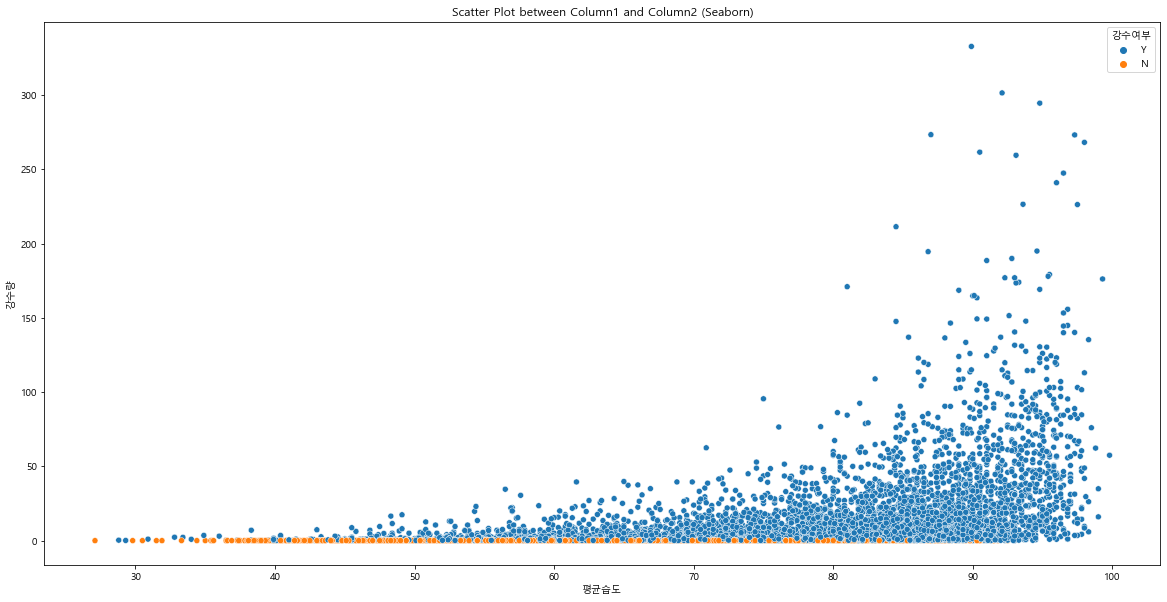

In [16]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=rain, x='평균습도', y='강수량', hue='강수여부')
plt.title('Scatter Plot between Column1 and Column2 (Seaborn)')
plt.show()

<Figure size 2160x1440 with 0 Axes>

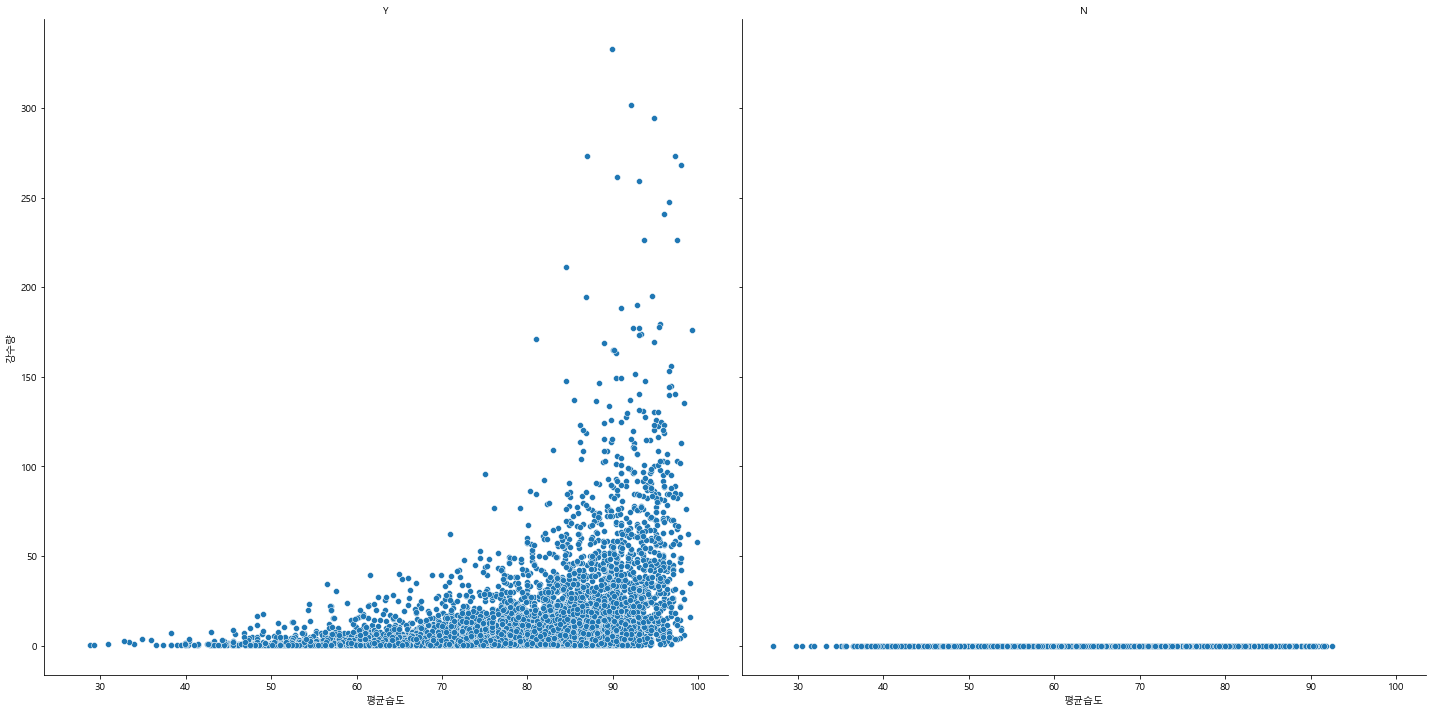

In [24]:
plt.figure(figsize=(30, 20))

# "Category" 컬럼 기준으로 서브플롯 생성
g = sns.FacetGrid(rain, col='강수여부', height=10, aspect=1)

# 각 서브플롯에 산점도 그리기
g.map(sns.scatterplot, '평균습도', '강수량')

# 각 서브플롯에 제목 추가
g.set_titles(col_template="{col_name}")

# 전체 그래프의 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

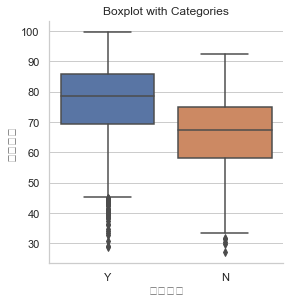

In [25]:
# "Category" 컬럼 기준으로 상자그림 그리기
sns.set(style="whitegrid")
g = sns.catplot(x='강수여부', y='평균습도', kind='box', data=rain, height=4, aspect=1)

# 그래프 제목 추가
plt.title('Boxplot with Categories')

# 그래프 표시
plt.show()

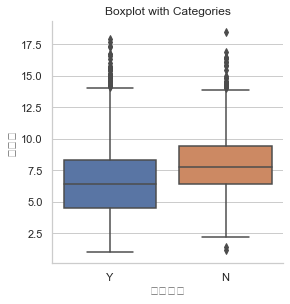

In [35]:
# "Category" 컬럼 기준으로 상자그림 그리기
sns.set(style="whitegrid")
g = sns.catplot(x='강수여부', y='일교차', kind='box', data=rain, height=4, aspect=1)

# 그래프 제목 추가
plt.title('Boxplot with Categories')

# 그래프 표시
plt.show()

# 강수여부가 N일 경우의 최고 평균습도의 이상은 비가 왔을것이라고 가정하고 해당 평균습도의 평균강수량으로 값을 채워 넣어도 될 것

In [26]:
# 두 그룹으로 구분

rain_Y = rain[rain.강수여부 == "Y"]
rain_N = rain[rain.강수여부 == "N"]

In [27]:
rain_Y.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,6886.000000,6885.000000,6885.000000,6887.000000,6887.000000,6884.000000,6797.000000,5386.000000,6780.000000,6887.000000
mean,18.334272,11.793537,6.539274,12.746072,76.968027,2.561926,2.511181,7.627755,20.302183,14.747902
std,9.566600,9.944782,2.636001,24.513181,11.696759,1.068281,3.009824,5.367134,24.891082,9.525334
min,-9.200000,-20.200000,1.000000,0.100000,28.800000,0.100000,0.000000,0.000000,0.000000,-14.900000
25%,10.600000,3.600000,4.500000,0.800000,69.500000,1.800000,0.000000,3.250000,0.000000,6.900000
50%,20.600000,13.800000,6.400000,3.600000,78.500000,2.400000,1.100000,6.500000,8.600000,16.800000
75%,26.300000,20.500000,8.300000,13.400000,85.800000,3.100000,4.500000,10.837500,35.600000,23.000000
max,38.000000,28.800000,17.900000,332.800000,99.800000,7.800000,12.700000,30.350000,94.800000,31.700000


In [29]:
rain_N.describe()

# 평균습도 92 이상의 날은 비가 왔다고 가정

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,2263.000000,2263.000000,2263.000000,2263.0,2263.000000,2263.000000,2249.000000,1707.000000,2219.000000,2263.000000
mean,15.820681,7.847813,7.972868,0.0,66.224834,2.448741,4.613384,10.759397,38.925282,11.491162
std,11.372162,11.373787,2.337950,0.0,11.883068,0.988048,3.201262,5.324611,27.373460,11.183440
min,-11.200000,-18.400000,1.200000,0.0,27.100000,0.200000,0.000000,0.210000,0.000000,-15.300000
25%,5.450000,-1.950000,6.400000,0.0,58.300000,1.800000,1.700000,6.705000,14.600000,1.650000
50%,16.600000,7.800000,7.800000,0.0,67.300000,2.300000,4.600000,10.040000,38.300000,11.800000
75%,26.500000,18.700000,9.400000,0.0,75.000000,2.900000,7.300000,14.405000,61.550000,22.100000
max,36.600000,28.700000,18.500000,0.0,92.500000,7.400000,13.100000,28.880000,94.800000,31.400000


In [30]:
#평균습도 92 이상인 날의 강수량 평균 도출

rain_Y[rain_Y.평균습도 >= 92].강수량.mean()

47.84278260869565

In [33]:
# 전체 데이터 셋중 평균습도가 92 이상이고, 강수량이 null값인 경우 식별 후 값 대체

prep_data = train.copy()
prep_data[prep_data.강수량.isnull() == True].loc[prep_data.평균습도 >= 92]

#3건... ㅋㅋㅋ;;

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
4744,1972-12-27,5.0,0.0,5.0,NaN,92.8,1.3,0.0,NaN,0.0,2.3
4970,1973-08-10,31.8,24.0,7.8,NaN,92.0,1.9,1.3,10.90,9.4,27.0
16063,2003-12-24,5.6,0.8,4.8,NaN,92.1,1.8,0.0,3.66,0.0,2.5


In [63]:
# 다시 이번엔 월별 강수량을 분석해보자

month_data = train.copy()
month_data = month_data[month_data.강수량.isnull() == False]
month_data

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,월
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9,1
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0,1
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5,1
5,1960-01-06,-1.2,-9.5,8.3,0.0,51.3,1.8,7.7,NaN,NaN,-5.2,1
6,1960-01-07,6.0,-3.5,9.5,0.1,74.0,1.3,1.9,NaN,NaN,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23000,2022-12-21,2.6,-2.6,5.2,3.6,82.4,2.7,0.0,2.48,0.0,-0.1,12
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,12
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,12
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,12


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# ANOVA 모델 적합
model = ols('강수량 ~ 월', data=month_data).fit()

# ANOVA 분석 결과 요약
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 유의수준 0.05에서의 검정 결과 출력
p_value = anova_table['PR(>F)']['월']
if p_value < 0.05:
    print("유의수준 0.05에서 그룹 간의 평균은 다르다 (귀무가설 기각)")
else:
    print("유의수준 0.05에서는 그룹 간의 평균이 다르지 않다 (귀무가설 채택)")


                sum_sq      df          F        PR(>F)
월         1.157144e+04     1.0  24.042114  9.587326e-07
Residual  4.402922e+06  9148.0        NaN           NaN
유의수준 0.05에서 그룹 간의 평균은 다르다 (귀무가설 기각)


In [74]:
prep_data = train.drop(['일시'], axis = 1)

In [77]:
from sklearn.impute import KNNImputer

columns = prep_data.columns

# KNNImputer를 사용하여 결측치 대체
imputer = KNNImputer(n_neighbors=50)
imputed_data = imputer.fit_transform(prep_data)

# 대체된 데이터를 새로운 데이터프레임으로 생성
imputed_df = pd.DataFrame(imputed_data, columns=columns)

# 원래 데이터프레임과 대체된 데이터프레임을 병합
merged_df = prep_data.copy()  # 병합할 데이터프레임을 원래 데이터프레임으로 복사
merged_df.loc[:, :] = imputed_df.values  # 대체된 값으로 데이터프레임을 업데이트